<a href="https://colab.research.google.com/github/su-nitin/Eigen-Decompositions/blob/main/Eigen_decompositions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Eigen vector Transformations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
#symmetric matrix
#A = np.array([[3, -2, 4], [-2, 6, 2], [4, 2, 3]]) 
A = np.array([[3,1],[1,2]])
#eigen values
lambd, u = np.linalg.eig(A)
print('Eigen values = ', lambd, '\nEigen vectors = ', u)

Eigen values =  [3.61803399 1.38196601] 
Eigen vectors =  [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


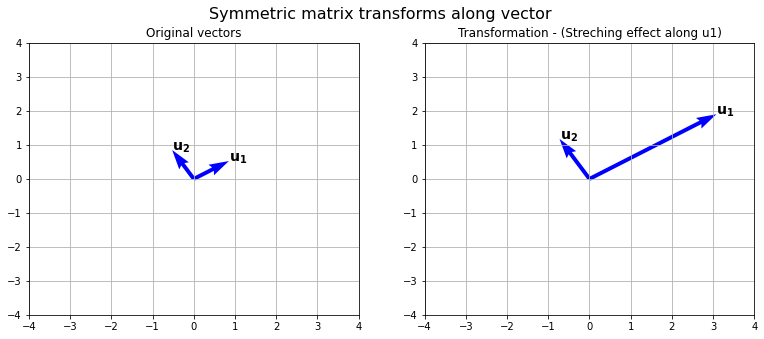

In [ ]:
#plot the eigen values
#for symmetric matrix eigen values will be orthogonal
u1 = u[:,0].reshape(2,1)
u2 = u[:,1].reshape(2,1)
origin = [0,0]
fig = plt.figure(figsize=(13,5))
fig.suptitle('Symmetric matrix transforms along vector', fontsize=16)
ax = fig.add_subplot(1,2,1)
ax.set_title('Original vectors')
ax.quiver(*origin, *u1, color='b', width=0.012, angles='xy', scale_units='xy', scale=1)
ax.quiver(*origin, *u2, color='b', width=0.012, angles='xy', scale_units='xy', scale=1)
ax.text(*u1, "$\mathbf{u_1}$", fontsize=14)
ax.text(*u2, "$\mathbf{u_2}$", fontsize=14)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
plt.grid()

t = A @ u
tx = fig.add_subplot(1,2,2)
tx.set_title('Transformation - (Streching effect along u1)')
Au1 = t[:,0]
Au2 = t[:,1]
tx.quiver(*origin, *Au1, color='b', width=0.012, angles='xy', scale_units='xy', scale=1)
tx.quiver(*origin, *Au2, color='b', width=0.012, angles='xy', scale_units='xy', scale=1)
tx.set_ylim(-4,4)
tx.set_xlim(-4,4)
tx.text(*Au1, "$\mathbf{u_1}$", fontsize=14)
tx.text(*Au2, "$\mathbf{u_2}$", fontsize=14)

plt.grid()
plt.show()

#Eigen Decomposition

In [ ]:
'''eigen decomposition for symmetric matrix
A = PD(P.T)
D = diagonal matrix of eigen values
P = Matix of eigen vectors [u1, u2, u3, - - - - - , un]
for symmetric matrix n ~ rank of matrix,
since symmetric matrix is a square matrix having shape nxn and linear independence in each row or column
thus number of eigenvector will be n ~ number of columns or rows.
'''
P = np.asarray([u[0,:], u[1,:]])
D = np.eye(A.shape[0],A.shape[1]) * lambd

#extracting A from decomposition
Ad = P @ (D @ P.T)
#check
print('A:\n', A, '\nAd:\n', Ad)

A:
 [[3 1]
 [1 2]] 
Ad:
 [[3. 1.]
 [1. 2.]]


#Singular Value Decomposition

In [ ]:
'''
for a symmetric or non-symmetric matrix decompostions S.V.D can be used
for a non square matrix A having shape m x n, m : rows, n : columns.
Eigen vectors of (A^T).A can be found since it is square matrix representation n x n 
alongwith being a symmetric matrix also.We assume eigen vectors of A^t.A to be normalized in
addition to being orthogonal.

A rectangular matrix A can be seen as 
A = U.Sigma.(V^T)
where
U -> Orthogonal basis of transformed unit vectors Of [Av1, Av2, - - - - ,Avr] (r ~ rank of A)
Sigma -> m x n diagonal matrix of r x r singular values padded with 0s.
V -> orthonormal set of normalized and orthogonal vectors [v1, v2, v3, v4 , - - - - - ,vn].

rank r of a will be number non-zero eigen values derived either from (A^T).A in case of m x n
or A in case of n x n.

A singular value is length of vector.

'''
# 2x3 rectangular matrix
A = np.array([[4, 1, 3],[8, 3, -2]])
# 3x3 square transformation
At = A.T @ A
# Eigen values and vectors
lambd, v = np.linalg.eig(At)

'''V is orthonormal set, Using this we calculate all the transformations
of form Av(i) such that resulting vectors form orthogonal basis'''
# check rank of matrix
lambd_r = lambd[lambd > 1e-8]
r = np.sum(lambd_r != 0)
# sort the v according to lambda values for getting V
V = v[:, lambd.argsort()[::-1]]
# Getting singular values and storing in Sigma
singular_vars = np.sqrt(np.sort(lambd_r)[::-1])
Sig = np.zeros((A.shape[0], A.shape[1])) 
Sig[:r,:r] = np.diag(singular_vars)
# orthogonal set
U = A @ V[:,:r] / singular_vars

# Performing SVD
As = U @ (Sig @ V.T)
print('A\n', A, '\nA(SVD)\n', As)

A
 [[ 4  1  3]
 [ 8  3 -2]] 
A(SVD)
 [[ 4.  1.  3.]
 [ 8.  3. -2.]]


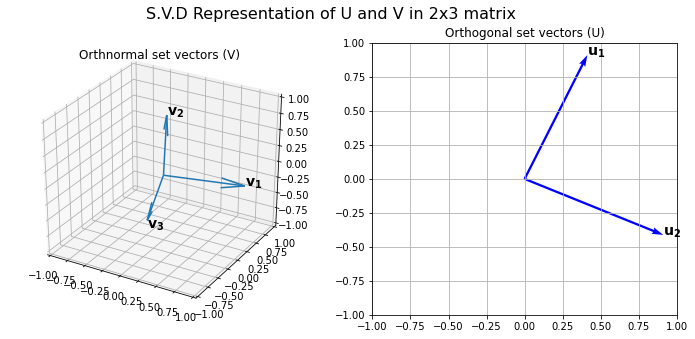

In [ ]:
# plots from SVD
# V
fig = plt.figure(figsize=(12, 5))
fig.suptitle('S.V.D Representation of U and V in 2x3 matrix', fontsize=16)
ax1 = fig.add_subplot(121, projection='3d')
origin3d = [0, 0, 0]
ax1.set_xlim3d(-1, 1)
ax1.set_ylim3d(-1, 1)
ax1.set_zlim3d(-1, 1)
ax1.quiver3D(*origin3d, *V[:, 0])
ax1.quiver3D(*origin3d, *V[:, 1])
ax1.quiver3D(*origin3d, *V[:, 2])
ax1.text(*V[:, 0], "$\mathbf{v_1}$", fontsize=14)
ax1.text(*V[:, 1], "$\mathbf{v_2}$", fontsize=14)
ax1.text(*V[:2, 2], V[2,2]-0.12, "$\mathbf{v_3}$", fontsize=14)
ax1.set_title('Orthnormal set vectors (V)')

# U
ax2 = fig.add_subplot(122)
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.quiver(*origin, *U[:, 0], color='b', scale_units='xy', angles='xy', scale=1)
ax2.quiver(*origin, *U[:, 1], color='b', scale_units='xy', angles='xy', scale=1)
ax2.text(*U[:, 0], "$\mathbf{u_1}$", fontsize=14)
ax2.text(*U[:, 1], "$\mathbf{u_2}$", fontsize=14)
ax2.grid()
ax2.set_title('Orthogonal set vectors (U)')
plt.show()

#Moore - Penrose Inverse

In [ ]:
''' 
Also called Pseudo-inverse of a matrix, 
it is given as
Pin(A) = A^+ = V.Sigma^+.U^T
'''
# calculate inverse of non-zero singular values
Siginv = np.zeros((A.shape[0], A.shape[1]))
singular_inv = 1 / singular_vars
Siginv[:r, :r] = np.diag(singular_inv)
# calculate inverse
Ainv = V @ (Siginv.T @ U)
# compare with numpy solution
print('pinv(A)\n', np.linalg.pinv(A), '\nAinv\n', Ainv)

pinv(A)
 [[ 0.06546081  0.07924203]
 [-0.00861326  0.042205  ]
 [ 0.24892334 -0.11972438]] 
Ainv
 [[ 0.06546081  0.07924203]
 [-0.00861326  0.042205  ]
 [ 0.24892334 -0.11972438]]
